In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data pre-processing 

In [2]:
age_range = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }
occupations = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer",
                12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed",
                17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }

In [3]:
# To create new input csv files
users_csv_file = 'users.csv'
movies_csv_file = 'movies.csv'
ratings_csv_file = 'ratings.csv'

In [4]:
ratings = pd.read_csv('ratings.dat', sep='::', engine='python', encoding='latin-1',
                      names=['user_id', 'movie_id', 'rating', 'timestamp'])

max_userid = ratings['user_id'].drop_duplicates().max()
max_movieid = ratings['movie_id'].drop_duplicates().max()

ratings['user_new_id'] = ratings['user_id'] - 1
ratings['movie_new_id'] = ratings['movie_id'] - 1

# print (len(ratings), 'ratings loaded')

In [5]:
# To convert the input dat files to csv
ratings.to_csv(ratings_csv_file, sep='\t', header=True, encoding='latin-1', 
               columns=['user_id', 'movie_id', 'rating', 'timestamp', 'user_new_id', 'movie_new_id'])
# print ('Saved to', ratings_csv_file)

In [6]:
users = pd.read_csv('users.dat', sep='::', engine='python', encoding='latin-1',
                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
users['ageOrder'] = users['age'].apply(lambda x: age_range[x])
users['occOrder'] = users['occupation'].apply(lambda x: occupations[x])
# print (len(users), 'descriptions of', max_userid, 'users loaded.')

In [7]:
# To convert the input users.dat file to csv
users.to_csv(users_csv_file, sep='\t', header=True, encoding='latin-1',
             columns=['user_id', 'gender', 'age', 'occupation', 'zipcode', 'ageOrder', 'occOrder'])
# print ('Saved to', users_csv_file)

In [8]:
movies = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])
# print (len(movies), 'descriptions of', max_movieid, 'movies loaded.')

In [9]:
movies.to_csv(movies_csv_file, sep='\t', header=True, 
              columns=['movie_id', 'title', 'genres'])
# print ('Saved to', movies_csv_file)

In [10]:
# To read the new input ratings, users and movies csv files
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'ageOrder', 'occOrder'])

movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

### Data Analysis

In [11]:
# print (users.shape)
users.head()

,user_id,gender,zipcode,ageOrder,occOrder
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [12]:
# print(ratings.shape)
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [13]:
# print(movies.shape)
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


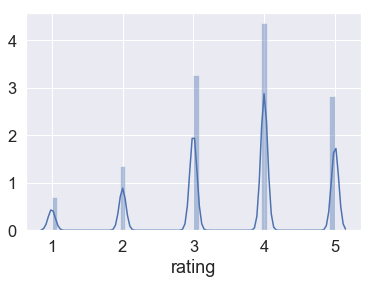

In [14]:
# To import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# To display the ratings distribution
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [15]:
# Joining the 3 files into a dataset
dataset = pd.merge(pd.merge(movies, ratings),users)
# To display the 20 highest rating movies
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [16]:
# To make a set of the genre words
genreWords = set()
for genre in movies['genres'].str.split('|').values:
    genreWords = genreWords.union(set(genre))

# To keep a count of the number of times a genre keyword appears
def wordCount(dataset, refCol, labels):
    keywordCount = dict()
    for s in labels: 
        keywordCount[s] = 0
    for labelKeywords in dataset[refCol].str.split('|'):        
        if type(labelKeywords) == float and pd.isnull(labelKeywords): 
            continue    
            
        for s in [s for s in labelKeywords if s in labels]: 
            if pd.notnull(s): 
                keywordCount[s] += 1
   
    # To sort the genres by frequency of occurence
    keywordOccurences = []
    for k,v in keywordCount.items():
        keywordOccurences.append([k,v])
        
    keywordOccurences.sort(key = lambda x:x[1], reverse = True)
    return keywordOccurences, keywordCount

keywordOccurences, dum = wordCount(movies, 'genres', genreWords)
keywordOccurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

### Content-based Model

In [17]:
# Split the genres
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidfMatrix = tf.fit_transform(movies['genres'])
# tfidfMatrix.shape

In [19]:
from sklearn.metrics.pairwise import linear_kernel
cosineSim = linear_kernel(tfidfMatrix, tfidfMatrix)
cosineSim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [20]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def movieRecommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosineSim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [21]:
movieRecommendations('American Beauty (1999)').head(20)

44                                     To Die For (1995)
71                          Kicking and Screaming (1995)
74                                      Big Bully (1996)
83                    Last Summer in the Hamptons (1995)
104           Nobody Loves Me (Keiner liebt mich) (1994)
131                                     Nueba Yol (1995)
164                          Doom Generation, The (1995)
203                               Unstrung Heroes (1995)
216                              Boys on the Side (1995)
229                           Eat Drink Man Woman (1994)
232                                       Ed Wood (1994)
301                                     Roommates (1995)
319                          Swimming with Sharks (1995)
341    Adventures of Priscilla, Queen of the Desert, ...
367                                    Paper, The (1994)
368                                 Reality Bites (1994)
446                                   With Honors (1994)
468                            

In [22]:
movieRecommendations('Jumanji (1995)').head(20)

55                         Kids of the Round Table (1995)
59                     Indian in the Cupboard, The (1995)
124                     NeverEnding Story III, The (1994)
996                       Escape to Witch Mountain (1975)
1898                                     Labyrinth (1986)
1936                                  Goonies, The (1985)
1974            Darby O'Gill and the Little People (1959)
2092                        NeverEnding Story, The (1984)
2093    NeverEnding Story II: The Next Chapter, The (1...
2330                        Santa Claus: The Movie (1985)
1489                            Warriors of Virtue (1997)
1542                                Simple Wish, A (1997)
1006                  20,000 Leagues Under the Sea (1954)
1698                                      Star Kid (1997)
2024                                  Return to Oz (1985)
7                                     Tom and Huck (1995)
144                   Amazing Panda Adventure, The (1995)
156           

In [23]:
movieRecommendations('Walking Dead, The (1995)').head(20)

153                    Beyond Rangoon (1995)
332                 Walking Dead, The (1995)
523                  Schindler's List (1993)
641                Courage Under Fire (1996)
967                  Nothing Personal (1995)
979                   Michael Collins (1996)
1074                          Platoon (1986)
1162                   Paths of Glory (1957)
1190                   Apocalypse Now (1979)
1199                              Ran (1985)
1206                          Henry V (1989)
1230    Bridge on the River Kwai, The (1957)
1243                 Deer Hunter, The (1978)
1252                           Patton (1970)
1279              Killing Fields, The (1984)
1473                    Paradise Road (1997)
1576             Seven Years in Tibet (1997)
1624              Welcome To Sarajevo (1997)
1649                             Bent (1997)
1799                       Truce, The (1996)
Name: title, dtype: object

### Collaborative Filtering Model

In [24]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [25]:
# Randomly sample 1% of the ratings dataset
sampleData = ratings.sample(frac=0.02)
# Check the sample info
print(sampleData.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 356987 to 991492
Data columns (total 3 columns):
user_id     20004 non-null int64
movie_id    20004 non-null int64
rating      20004 non-null int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [26]:
 from sklearn.model_selection import train_test_split
train, test = train_test_split(sampleData, test_size=0.2)

In [27]:
# Create two user-item matrices, one for training and another for testing
trainMatrix = train.as_matrix(columns = ['user_id', 'movie_id', 'rating'])
testMatrix = test.as_matrix(columns = ['user_id', 'movie_id', 'rating'])

# Check their shape
print(trainMatrix.shape)
print(testMatrix.shape)

(16003, 3)
(4001, 3)


E:\Bhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
E:\Bhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[1.         0.84405726 0.72450492 0.97695908]
 [0.84405726 1.         0.24190069 0.71015869]
 [0.72450492 0.24190069 1.         0.8549202 ]
 [0.97695908 0.71015869 0.8549202  1.        ]]


In [29]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(trainMatrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.02709328  0.00554464]
 [-0.02709328  1.         -0.07488286]
 [ 0.00554464 -0.07488286  1.        ]]


In [30]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
        
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [32]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(trainMatrix, user_correlation, type='user')
item_prediction = predict(trainMatrix, item_correlation, type='item')

# RMSE on the test data
print('RMSE for user: ' + str(rmse(user_prediction, testMatrix)))
print('RMSE for item: ' + str(rmse(item_prediction, testMatrix)))

RMSE for user: 1420.4819171219995
RMSE for item: 1632.3168340845762


In [33]:
# RMSE on the train data
print('RMSE for user: ' + str(rmse(user_prediction, trainMatrix)))
print('RMSE for item: ' + str(rmse(item_prediction, trainMatrix)))

RMSE for user: 694.5713010064641
RMSE for item: 196.81347659664655
